# Importando as bibliotecas

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

# Importação dos dados e visualização

In [234]:
# Carregar o dataset
df = pd.read_csv('House_Rent_Dataset.csv')

# Visualizar as primeiras linhas
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [236]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


# Tratamento das colunas

* Várias colunas não estão em formato adequado

In [237]:
# conversão da data para ano mês e dia
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Year'] = df['Posted On'].dt.year
df['Month'] = df['Posted On'].dt.month
df['Day'] = df['Posted On'].dt.day
df = df.drop(columns=['Posted On'])  #remover coluna


In [238]:
#visualização das linhas
print(df['City'].unique())
print(df['Area Locality'].unique())
print(df['Area Type'].unique())
print(df['Tenant Preferred'].unique())
print(df['Point of Contact'].unique())


['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad']
['Super Area' 'Carpet Area' 'Built Area']
['Bachelors/Family' 'Bachelors' 'Family']
['Contact Owner' 'Contact Agent' 'Contact Builder']


* Area Locality, City, Tenant Preferred, Point of Contact, Area Type podem ser agrupados pela média do aluguel para cada categoria

In [239]:
#group by para gerar uma nova coluna para a media
area_rent_mean = df.groupby('Area Locality')['Rent'].mean()
df['Area Rent Encoded'] = df['Area Locality'].map(area_rent_mean)

area_rent_mean = df.groupby('City')['Rent'].mean()
df['City Rent Encoded'] = df['City'].map(area_rent_mean)

tenant_rent_mean = df.groupby('Tenant Preferred')['Rent'].mean()
df['Tenant Preferred Encoded'] = df['Tenant Preferred'].map(tenant_rent_mean)

tenant_rent_mean = df.groupby('Point of Contact')['Rent'].mean()
df['Point of Contact Encoded'] = df['Point of Contact'].map(tenant_rent_mean)

tenant_rent_mean = df.groupby('Area Type')['Rent'].mean()
df['Area Type Encoded'] = df['Area Type'].map(tenant_rent_mean)


In [240]:
df.head()


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Area Rent Encoded,City Rent Encoded,Tenant Preferred Encoded,Point of Contact Encoded,Area Type Encoded
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,8250.0,11645.173664,31210.792683,16704.206468,18673.396566
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,11750.0,11645.173664,31210.792683,16704.206468,18673.396566
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,23187.5,11645.173664,31210.792683,16704.206468,18673.396566
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,16000.0,11645.173664,31210.792683,16704.206468,18673.396566
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,7500.0,11645.173664,42143.793976,16704.206468,52385.897302


In [241]:
print(df['Year'].unique())

[2022]


* year e day apresenta valores que podem atrapalhar, vamos dar um drop, e retirar valores objetos do nosso df

In [242]:
df_numeric = df.select_dtypes(exclude=['object']).drop(columns=['Year', 'Day'])

In [243]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day,Area Rent Encoded,City Rent Encoded,Tenant Preferred Encoded,Point of Contact Encoded,Area Type Encoded
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,18,8250.0,11645.173664,31210.792683,16704.206468,18673.396566
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,13,11750.0,11645.173664,31210.792683,16704.206468,18673.396566
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,16,23187.5,11645.173664,31210.792683,16704.206468,18673.396566
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,4,16000.0,11645.173664,31210.792683,16704.206468,18673.396566
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,9,7500.0,11645.173664,42143.793976,16704.206468,52385.897302


In [244]:
df_numeric.head()

,BHK,Rent,Size,Bathroom,Month,Area Rent Encoded,City Rent Encoded,Tenant Preferred Encoded,Point of Contact Encoded,Area Type Encoded
0,2,10000,1100,2,5,8250.0,11645.173664,31210.792683,16704.206468,18673.396566
1,2,20000,800,1,5,11750.0,11645.173664,31210.792683,16704.206468,18673.396566
2,2,17000,1000,1,5,23187.5,11645.173664,31210.792683,16704.206468,18673.396566
3,2,10000,800,1,7,16000.0,11645.173664,31210.792683,16704.206468,18673.396566
4,2,7500,850,1,5,7500.0,11645.173664,42143.793976,16704.206468,52385.897302


In [245]:
# Estatísticas descritivas
df_numeric.describe()

,BHK,Rent,Size,Bathroom,Month,Area Rent Encoded,City Rent Encoded,Tenant Preferred Encoded,Point of Contact Encoded,Area Type Encoded
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866,5.755794,34993.451327,34993.451327,34993.451327,34993.451327,34993.451327
std,0.832256,7.810641e+04,634.202328,0.884532,0.832426,57543.933495,25951.456677,6464.547698,26537.143364,16853.776727
min,1.000000,1.200000e+03,10.000000,1.000000,4.000000,2200.000000,11645.173664,31210.792683,5500.000000,10500.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,5.000000,11350.000000,20555.048387,31210.792683,16704.206468,18673.396566
50%,2.000000,1.600000e+04,850.000000,2.000000,6.000000,16772.727273,24966.365688,31210.792683,16704.206468,18673.396566
75%,3.000000,3.300000e+04,1200.000000,2.000000,6.000000,33625.000000,29461.983471,42143.793976,73481.158927,52385.897302
max,6.000000,3.500000e+06,8000.000000,10.000000,7.000000,1000000.000000,85321.204733,50020.341102,73481.158927,52385.897302


In [246]:

# Verificar valores nulos
df_numeric.isnull().sum()

BHK                         0
Rent                        0
Size                        0
Bathroom                    0
Month                       0
Area Rent Encoded           0
City Rent Encoded           0
Tenant Preferred Encoded    0
Point of Contact Encoded    0
Area Type Encoded           0
dtype: int64

In [247]:
# Remover linhas com valores nulos (exemplo)
df_numeric = df_numeric.dropna()


# Visualização

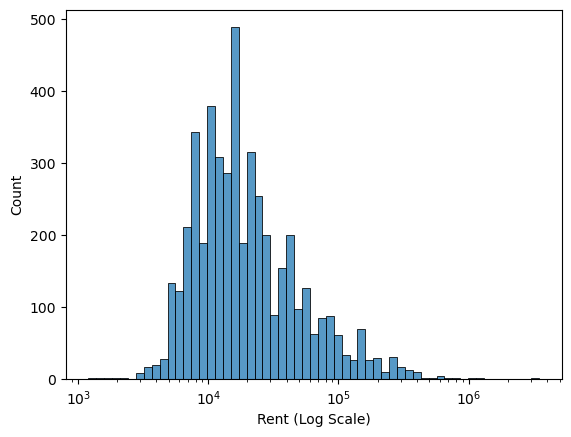

In [248]:

sns.histplot(df_numeric['Rent'], log_scale=(True, False))
plt.xlabel('Rent (Log Scale)')
plt.ylabel('Count')
plt.show()





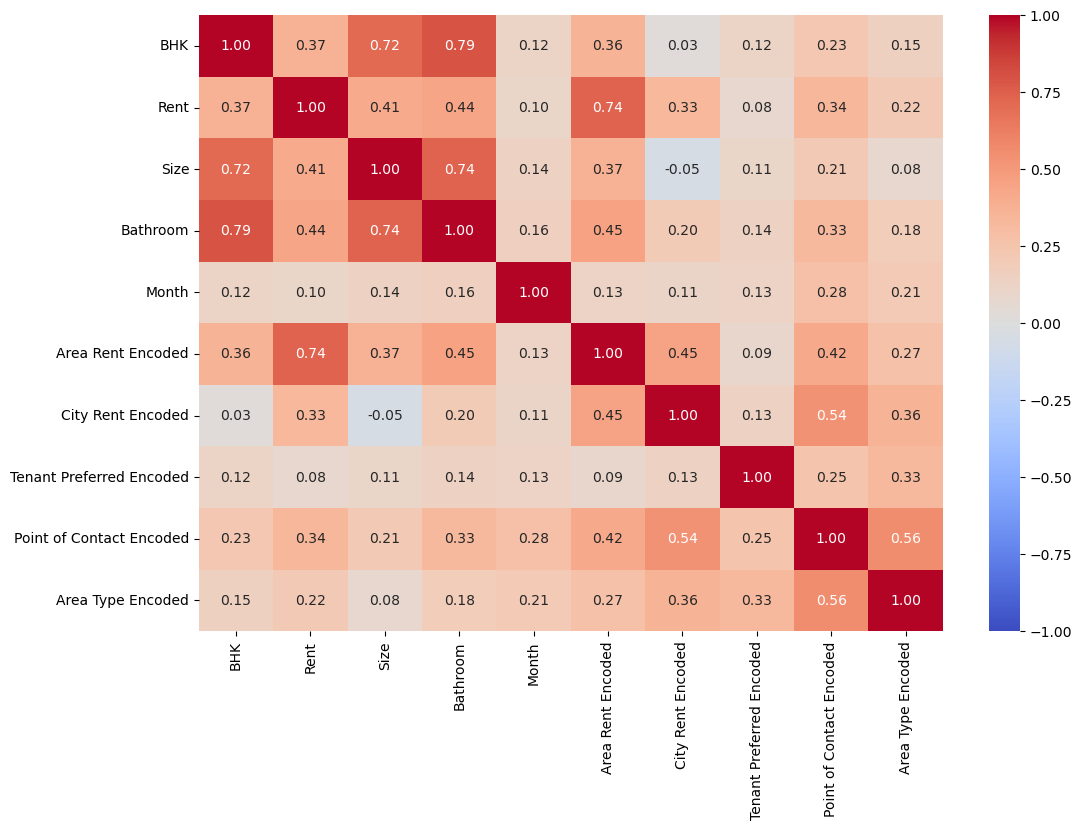

In [249]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.show()


* Rent e Area Rent: 0,74, correlação postiva forte (diretamente proporcional)
* Bathroom e Rent: 0,44, correlação positiva moderada


# Treino

In [250]:

#definição das nossas variaveis
X = df_numeric.drop(columns=['Rent'])
y = df_numeric['Rent']


In [251]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [252]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(normalize=False)

In [253]:
print(lm.intercept_)

-19198.15764113841


In [254]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
BHK,-777.601618
Size,24.926136
Bathroom,139.760547
Month,-1726.953385
Area Rent Encoded,0.878188
City Rent Encoded,0.122626
Tenant Preferred Encoded,0.116584
Point of Contact Encoded,0.029031
Area Type Encoded,0.023979


* Size aumenta 25.047459 o valor do aluguel
* Bathroom aumenta 167.035221 o valor do aluguel
* Area Rent Encoded	(valor médio do aluguel na área específica do imóvel) conforme o aluguel médio da área aumenta em uma unidade, o Rent aumenta em 0.88

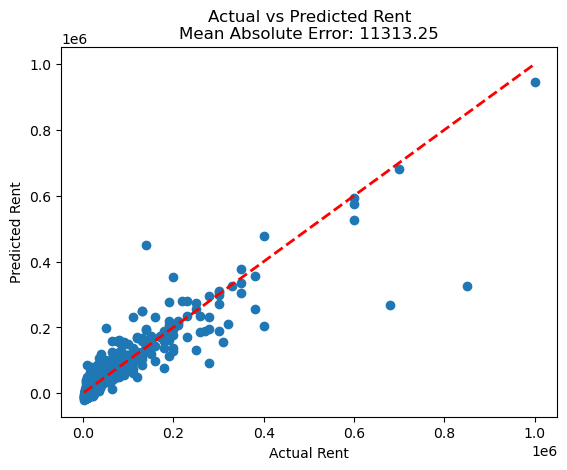

In [255]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title(f"Actual vs Predicted Rent\nMean Absolute Error: {mae:.2f}")
plt.show()


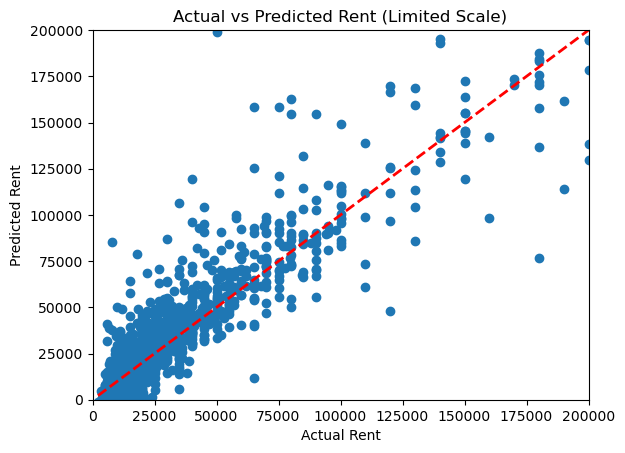

In [256]:
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlim(0, 200000)  # Ajuste conforme necessário
plt.ylim(0, 200000)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent (Limited Scale)")
plt.show()


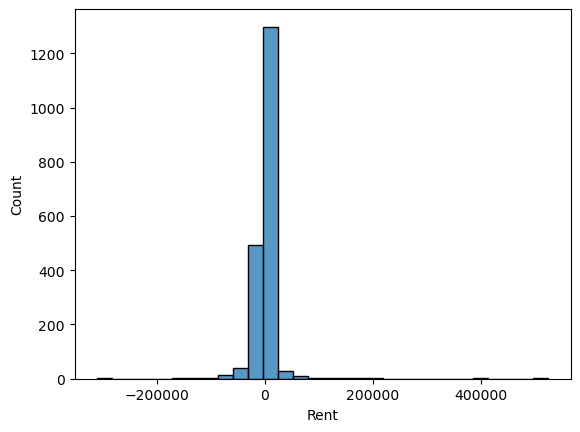

In [257]:

sns.histplot((y_test-predictions),bins=30);

In [258]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 11313.254627873259
MSE: 637176619.8447127
RMSE: 25242.357652262057
